## Тест 1

Копчев Владислав, 197

#### Задание 1.

Мы знаем рекуррентную формулу $X_n = 3X_{n-1} + 5X_{n-2} \mod n$ и начальные условия $X_1, X_2$. Напишем функцию, которая реализует рекуррентную формулу и выведем ответ.

In [1]:
def x(n):
    if n == 1:
        return 23
    elif n == 2:
        return 66
    else:
        return (3 * x(n-1) + 5 * x(n-2)) % 100

In [2]:
xs= []
for i in range(1, 15):
    print(i, x(i) / 100)
    xs.append(x(i) / 100)

1 0.23
2 0.66
3 0.13
4 0.69
5 0.72
6 0.61
7 0.43
8 0.34
9 0.17
10 0.21
11 0.48
12 0.49
13 0.87
14 0.06


Проверим на графике, похожа ли наша последовательность $X_n$ на последовательность равномерно распределенных на $[0, 1]$ чисел:

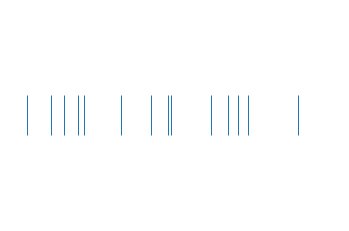

In [3]:
import matplotlib.pyplot as plt
import numpy as np

a = xs

plt.hlines(1,1,20)  # Draw a horizontal line
plt.xlim(0,1)
plt.ylim(0.5,1.5)

y = np.ones(np.shape(a))   # Make all y values the same
plt.plot(a,y,'|',ms = 40)  # Plot a line at each location specified in a
plt.axis('off')
plt.show()

(array([2., 2., 1., 1., 1., 2., 1., 2., 1., 1.]),
 array([0.06 , 0.141, 0.222, 0.303, 0.384, 0.465, 0.546, 0.627, 0.708,
        0.789, 0.87 ]),
 <BarContainer object of 10 artists>)

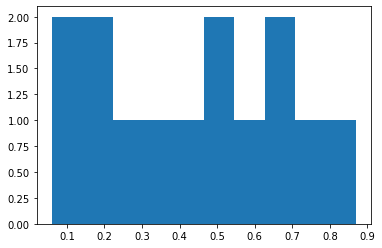

In [4]:
plt.hist(a)

Итог: более-менее похожа (учитывая то, что в последовательности всего 14 элементов).

#### Задание 2.

Как сказано в лекциях, алгоритм непрерывного обратного преобразования таков:

1. Берем случайную величину $X \sim F, F(x) = \int_{-\infty}^x \rho(t)dt$

2. Ищем $F^{-1}$

3. Генерируем $U_1, \ldots, U_n$ из распределения $U[0, 1]$

4. Пусть $X_k = F^{-1}(U_k)$

5. Тогда $X_1, \ldots, X_n$ — последовательность чисел из распределения $F$.

Решение:

1. Имея плотность $\rho(t)$ получаем после несложных преобразований по линейности интеграла функцию распределения $F(x) = \alpha \cdot k^{\alpha} \cdot \int_{-\infty}^x t^{-1-\alpha} \cdot I_{t > \alpha} dt = \alpha \cdot k^{\alpha} \cdot \int_{\alpha}^x t^{-1-\alpha} dt = \alpha k^{\alpha} \frac{t^{-\alpha}}{-\alpha}|_{t=k}^x = \alpha k^{\alpha} \cdot \frac{\alpha}{k^{\alpha}} - \alpha k^{\alpha} \cdot (\frac{1}{\alpha x^{\alpha}}) = 1 - (\frac{k}{x})^{\alpha}$. 

2. Найдем $F^{-1}$. Пусть $X_k = F^{-1}(U_k)$. Тогда $F(X_k) = F(F^{-1}(U_k))$. То есть, $x = F^{-1}(u) \Leftrightarrow F(x) = u$. Нам известно $F$, так что найдем решение второго уравнения: $F(x) = u \Leftrightarrow 1 - (\frac{k}{x})^{\alpha} = u \Leftrightarrow  (\frac{k}{x})^{\alpha} = 1 - u \Leftrightarrow  x^{\alpha} = \frac{k{^\alpha}}{1-u} \Leftrightarrow x = \frac{k}{(1-u)^{\alpha}} = F^{-1}(u)$. Реализуем ее в функции `inv_pareto_cdf(u)`

3. Теперь генерируем $U_1, \ldots, U_{1000}$. Для простоты воспользуемся не нашим примитивным и долго работающим генератором, а специальной функцией `np.random.uniform` из библиотеки `numpy`.

4. Пусть `sample` — наша последовательность $U_1, \ldots, 1000$, $\alpha=2, k=1$. Тогда $X_k = F^{-1}(U_k)$, а все это мы уже умеем вычислять.

5. Запустим код ниже и сгенерируем числа.

In [5]:
def inv_pareto_cdf(u, k, a):
    return k / ((1 - u)**a)

In [6]:
sample = np.random.uniform(0, 1, 1000)
x_ks = []

for u_k in sample:
    x_k = inv_pareto_cdf(u_k, 1, 2)
    x_ks.append(x_k)

Вместо того, чтобы выводить все 1000 элементов, нарисуем график, используя логарифмическую шкалу (поскольку разброс чисел в `x_ks` большой, без этой шкалы график будет неинформативным):

In [7]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

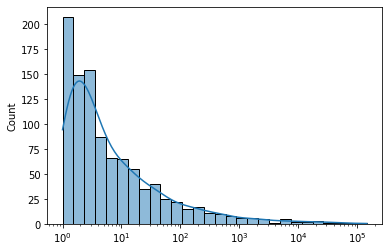

In [21]:
sns.histplot(x_ks[:1000], kde=True, log_scale=True)

Теперь массив `x_ks` содержит последовательность $X_k$, а по графику мы видим, что гистограмма нашей последовательности действительно похожа на гистограмму распределения Парето.

#### Задание 3.

Известно, что случайная величина, выдающая 1, если осложнение есть, и 0 иначе, — это $X \sim$ Bern$(p), p =0.1$. Известно, что $\hat{p} = \frac{9}{142}$ — вероятность осложнения на выборке с новой разработкой, $Y(q)$ — случайная величина для осложнения с новой разработкой (то есть, наша выборка — ее реализация). Необходимо определить, можно ли считать, что $q < p$ — статистически значимое различие?

В задаче требуется предложить проверку гипотезы $q < p$.

Для этого сгенерируем распределение Бернулли с помощью дискретного метода обратного преобразования как на лекции. Дальше используем непараметрический тест для определения стат. значимости различия среднего в выборках, ведь $\mathbb{E}X = p$.